In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [7]:
data = pd.read_csv('market_segmentation_dummy.csv')
data.head()

(30, 2)


,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06


[]

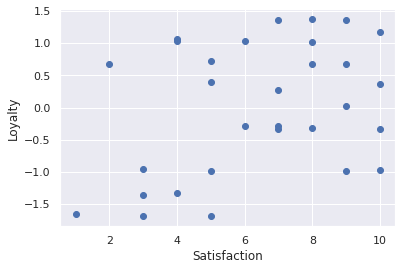

In [34]:
plt.scatter(data['Satisfaction'], data['Loyalty'])
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.plot()

Let's first start with two clusters

In [48]:
x = data.copy()

In [49]:
kmeans = KMeans(2)
kmeans.fit(x)

KMeans(n_clusters=2)

In [50]:
clusters1 = x.copy()
clusters1['Cluster'] = kmeans.predict(x)

[]

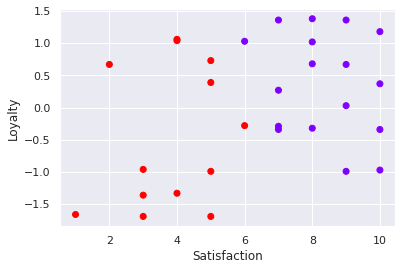

In [51]:
plt.scatter(clusters1['Satisfaction'], clusters1['Loyalty'], c=clusters1['Cluster'], cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.plot()

It seems that the algorithm clustered the data based only on `Satisfaction`. This is because it has a much large scale than `Loyalty`, we can solve this through standardization. `Loyalty` is already scaled with a mean of 0 and standard deviation of 1, so this operation won't have any effect on it.

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

Let's rerun the algorithm with two clusters after scaling the data

[]

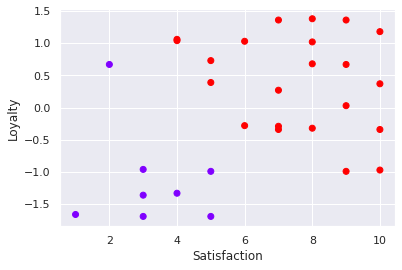

In [52]:
kmeans = KMeans(2)
kmeans.fit(x_scaled)

clusters2 = x.copy()
clusters2['Cluster'] = kmeans.predict(x_scaled)

plt.scatter(clusters2['Satisfaction'], clusters2['Loyalty'], c=clusters2['Cluster'], cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.plot()

We should note that the points we are plotting are the original ones (pre-scaling) but the clustering is based on the standardized ones. Let's compare between plotting the original values and the scaled values.

[]

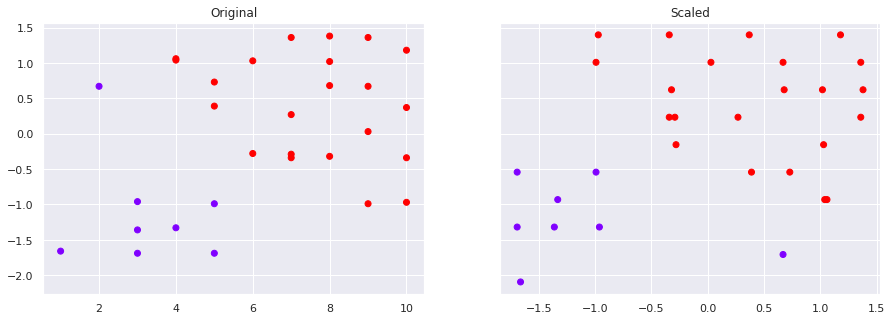

In [56]:
post_scaling = pd.DataFrame({'Loyalty': x_scaled[:, 0], 'Satisfaction': x_scaled[:, 1], 'Cluster': kmeans.predict(x_scaled)})

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(15, 5))

ax1.scatter(clusters2['Satisfaction'], clusters2['Loyalty'], c=clusters2['Cluster'], cmap='rainbow')
ax1.set_title('Original')
ax2.scatter(post_scaling['Satisfaction'], post_scaling['Loyalty'], c=post_scaling['Cluster'], cmap='rainbow')
ax2.set_title('Scaled')
plt.plot()

As we can see, if we plot the scaled values we would be looking at the scaled version of `Satisfaction` with zero mean. Instead we are interested in seeing its true values .

Now, comparing the clustering result post and pre scaling, we can see that this time both features were taken into account

[]

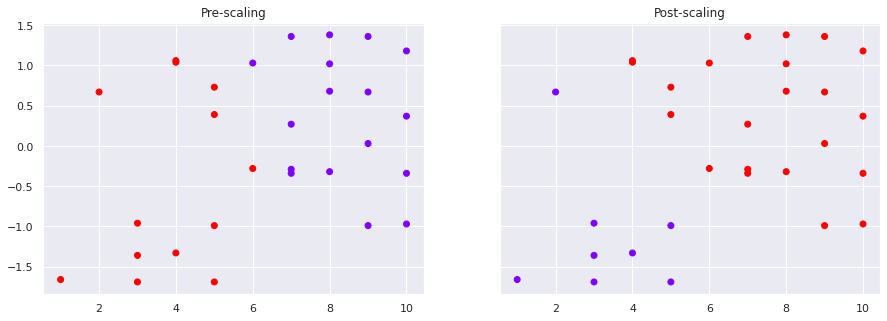

In [55]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(15, 5))

ax1.scatter(clusters1['Satisfaction'], clusters1['Loyalty'], c=clusters1['Cluster'], cmap='rainbow')
ax1.set_title('Pre-scaling')
ax2.scatter(clusters2['Satisfaction'], clusters2['Loyalty'], c=clusters2['Cluster'], cmap='rainbow')
ax2.set_title('Post-scaling')
plt.plot()

We can employ the elbow method to reach the optimal number of clusters

In [59]:
wcss = []
for i in range(1, 10):
  kmeans = KMeans(i)
  kmeans.fit(x_scaled)
  wcss.append(kmeans.inertia_)

[]

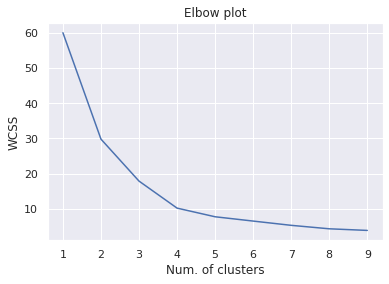

In [60]:
plt.plot(range(1,10), wcss)
plt.title('Elbow plot')
plt.xlabel('Num. of clusters')
plt.ylabel('WCSS')
plt.plot()

### 3 clusters

[]

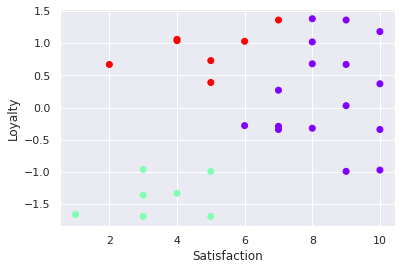

In [61]:
kmeans = KMeans(3)
kmeans.fit(x_scaled)

clusters3 = x.copy()
clusters3['Cluster'] = kmeans.predict(x_scaled)

plt.scatter(clusters3['Satisfaction'], clusters3['Loyalty'], c=clusters3['Cluster'], cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.plot()

We can see the green bottom left cluster represents the customers with the least satisfation and least loyalty, we will call this the `Alientated` cluster. The top red cluster represents those with high mid to low satisfaction but high loyalty, we will call those the `Supporter` cluster. Finally, the right purple cluster represents those withhigh satisfaction and mixed loyalty; let's see if we can further segment them.

[]

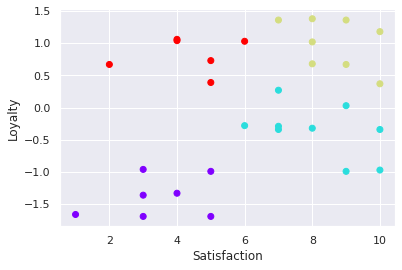

In [62]:
kmeans = KMeans(4)
kmeans.fit(x_scaled)

clusters4 = x.copy()
clusters4['Cluster'] = kmeans.predict(x_scaled)

plt.scatter(clusters4['Satisfaction'], clusters4['Loyalty'], c=clusters4['Cluster'], cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.plot()

The algorithm further segmented the last group into two clusters. The top right yellow one represents those with both high satisfaction and loyalty, we will call those `Fans`. The bottom right blue represents those with high satisfaction but low loyalty, we will call those `Roamers`.